# Business Problem

KBO Marketing Company LLC is a marketing company.  KBO Marketing has been retained by Apple and Google to perform the following:

- understand product sentiment analysis - in particular, whether or not the product sentiment is positive or not positive;
- and proactively respond to feedback that is less than positive via social media  

# Data Understanding

The data for examing the aforementioned problem comes from the following source: [Brands and Product Emotions](https://data.world/crowdflower/brands-and-product-emotions) 

Before beginning to create a model, I want to examine and become familiar with the dataset. I will conduct exploratory data analysis in order to understand the dataset attributes, which includes, but not limited to the following:

1. Number of Columns
2. Number of Rows
3. Column Names
4. Format of the data in each column

In [66]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

import nltk
import string
import re
nltk.download('punkt')
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.probability import FreqDist
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


[nltk_data] Downloading package punkt to C:\Users\16467/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\16467/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Reading file

df = pd.read_csv('tweet_product_company.csv')

In [51]:
# Examining first 25 rows

df.head(25)

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Not Positive
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive
3,@sxsw I hope this year's festival isn't as cra...,Not Positive
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive
5,@teachntech00 New iPad Apps For #SpeechTherapy...,Not Positive
7,"#SXSW is just starting, #CTIA is around the co...",Positive
8,Beautifully smart and simple idea RT @madebyma...,Positive
9,Counting down the days to #sxsw plus strong Ca...,Positive
10,Excited to meet the @samsungmobileus at #sxsw ...,Positive


In [53]:
# Examining last 25 rows

df.tail(25)

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
8696,&quot;If you were able to afford to attend #s...,Not Positive
8697,@mention you'll be at the google party tonight...,Not Positive
8698,@mention You're not sure how many you ate? Tha...,Not Positive
8699,You know you've made it to #sxsw when you see ...,Positive
8700,what are your essentials for #SxSW? Mine? poc...,Positive
8701,@mention your iPhone 4 cases are Rad and Ready...,Positive
8702,At #SXSW your iphone charger is your best friend.,Not Positive
8703,At &quot;Your Mom Has an iPad: Designing for B...,Not Positive
8704,At &quot;Your Mom Has an iPad&quot; session #y...,Not Positive
8705,At &quot;Your Mom Has an iPad&quot; session at...,Not Positive


In [5]:
# Getting column info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8721 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8720 non-null   object
 1   emotion_in_tweet_is_directed_at                     3169 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  8721 non-null   object
dtypes: object(3)
memory usage: 204.5+ KB


## Data Overview

I created a Pandas DataFrame from the csv file.  The DataFrame contains 8,721 rows of data.  The DataFrame contains the following columns:

- *df['tweet_text']* - this is the sentiment provided via tweet
- *df['emotion_in_tweet_is_directed_at']* - this is the brand, or product, in which the tweet is targeted
- *df['is_there_an_emotion_directed_at_a_brand_or_product']* - this is the emotional category of the tweet

All of the columns are in string format.

In [6]:
# Obtaining number of unique values for the following column - "df['emotion_in_tweet_is_directed_at']"

df['emotion_in_tweet_is_directed_at'].nunique()

9

In [7]:
# Obtaining Value Counts for the following column - "df['emotion_in_tweet_is_directed_at']"

df['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               910
Apple                              640
iPad or iPhone App                 451
Google                             412
iPhone                             288
Other Google product or service    282
Android App                         78
Android                             74
Other Apple product or service      34
Name: emotion_in_tweet_is_directed_at, dtype: int64

## Observations | Brand or Product

I utilized the following code - *df['emotion_in_tweet_is_directed_at'].value_counts()* - to understand the different brands and products that are captured by the respective column.  The different brands and products are the following: 

- iPad
- Apple
- iPad or iPhone App
- Google
- iPhone
- Other Google product or service
- Android App
- Android
- Other Apple product or service

A bar chart that breaks down the different brands and products is listed below.

Text(0.5, 1.0, 'Breakdown of Brand and Product')

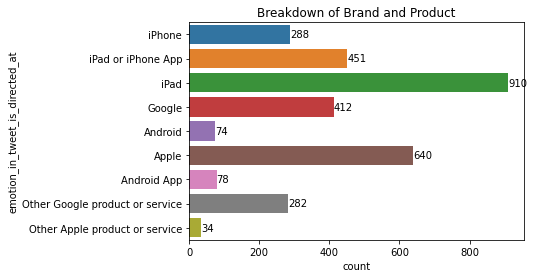

In [8]:
# Creating a Bar Chart of the Different Brands and Products

ax = sns.countplot(y='emotion_in_tweet_is_directed_at', data=df)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}', 
                (width, p.get_y() + p.get_height() / 2), 
                ha='left', va='center')  # Align text to the left of the bar and center vertically

plt.title("Breakdown of Brand and Product")

In [9]:
# Obtaining number of unique values for the following column - "df['is_there_an_emotion_directed_at_a_brand_or_product']"

df['is_there_an_emotion_directed_at_a_brand_or_product'].nunique()

4

In [10]:
# Obtaining Value Counts for the following column - "df['is_there_an_emotion_directed_at_a_brand_or_product']"

df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5156
Positive emotion                      2869
Negative emotion                       545
I can't tell                           151
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Observations | Brand or Product Sentiment

I utilized the following code - *df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()* - to understand the brand and product sentiment captured by the respective column.  There are a total of four different brand and product sentiments, which are the following:

- No emotion toward brand or product
- Positive emotion
- Negative emotion
- I can't tell 

In [11]:
# Examining missing values in each column

df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5552
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

## Observations | Missing Values

I utilized the following code - *df.isna().sum()* - to understand how many missing values are within each column.  There is a total of 5,552 missing values in the *df['emotion_in_tweet_is_directed_at']* column.

There is 1 missing value in the *df['tweet_text']* column.

The other column *df['is_there_an_emotion_directed_at_a_brand_or_product']* did not have any missing values.

In [12]:
# Checking for duplicates

df.duplicated().sum()

22

In [13]:
# Creating a dataframe for the duplicates

duplicates_all = df[df.duplicated(keep=False)]

In [14]:
# Examining the dataframe created for the duplicates

duplicates_all

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
17,I just noticed DST is coming this weekend. How...,iPhone,Negative emotion
20,Need to buy an iPad2 while I'm in Austin at #s...,iPad,Positive emotion
21,"Oh. My. God. The #SXSW app for iPad is pure, u...",iPad or iPhone App,Positive emotion
24,Really enjoying the changes in Gowalla 3.0 for...,Android App,Positive emotion
455,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
457,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
750,Google to Launch Major New Social Network Call...,NaN,No emotion toward brand or product
752,Google to Launch Major New Social Network Call...,NaN,No emotion toward brand or product


## Observations | Duplicate Rows

I utilized the following code - *df.duplicated().sum()* - to understand how many duplicates are present in the dataset.  There is a total of 22 duplicate rows.

# Data Preparation

The Data Understanding stage is complete.  Based on the exploratory data analysis, I will perform the following:

1. Remove duplicate rows
2. Remove observation that has a missing value in the *df['tweet_text']* column
3. Drop the column *df['emotion_in_tweet_is_directed_at'] from the Dataframe
4. Classify the brand or product sentiment into the two following categories - 1) Not Positive, or 2) Positive - via *df['is_there_an_emotion_directed_at_a_brand_or_product']* column 

## Remove Duplicate Rows

In [15]:
# Checking the number of duplicates

df.duplicated().sum()

22

In [16]:
# Removing duplicates

df.drop_duplicates(inplace=True)

In [17]:
# Checking the number of duplicates again

df.duplicated().sum()

0

In [18]:
# Checking the number of rows in the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8699 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8698 non-null   object
 1   emotion_in_tweet_is_directed_at                     3160 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  8699 non-null   object
dtypes: object(3)
memory usage: 271.8+ KB


I utilied the following code - *df.drop_duplicates(inplace=True)* - to remove the duplicates from the DataFrame.  The number of rows is now 8,699.

## Remove Observation with Missing Tweet

In [19]:
# Examining how many Missing Values are in each column

df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5539
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [20]:
# Removing row with missing tweet

df.dropna(subset=['tweet_text'], axis=0, inplace=True)

In [21]:
# Checking whether or not the row with the missing tweet has been removed

df.isna().sum()

tweet_text                                               0
emotion_in_tweet_is_directed_at                       5538
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [22]:
# Examining the Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8698 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8698 non-null   object
 1   emotion_in_tweet_is_directed_at                     3160 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  8698 non-null   object
dtypes: object(3)
memory usage: 271.8+ KB


I utilied the following code - *df.dropna(subset=['tweet_text'], axis=0, inplace=True)* - to remove the observation with the missing tweet from the DataFrame.  The aforementioned observation has been removed.  The number of rows is now 8,698.

## Removing the brand and product column

In [23]:
# Examining the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8698 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8698 non-null   object
 1   emotion_in_tweet_is_directed_at                     3160 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  8698 non-null   object
dtypes: object(3)
memory usage: 271.8+ KB


In [24]:
# Remove the df['emotion_in_tweet_is_directed_at'] column

df.drop('emotion_in_tweet_is_directed_at', axis=1, inplace=True)

In [25]:
# Checking whether or not the column has been removed

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8698 entries, 0 to 8720
Data columns (total 2 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8698 non-null   object
 1   is_there_an_emotion_directed_at_a_brand_or_product  8698 non-null   object
dtypes: object(2)
memory usage: 203.9+ KB


I utilied the following code - *df.drop('emotion_in_tweet_is_directed_at', axis=1, inplace=True)* - to remove the brand and product column.  The aforementioned column has been removed.

## Classify the brand or product sentiment

In [26]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5142
Positive emotion                      2861
Negative emotion                       544
I can't tell                           151
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [27]:
# Creating a DataFrame that captures the "I can't tell" sentiment

I_cannot_tell = df[(df['is_there_an_emotion_directed_at_a_brand_or_product'] == "I can't tell")].index

In [28]:
# Removing rows with a brand / product sentiment that is "I can't tell"

df.drop(I_cannot_tell, inplace=True)

In [29]:
# Checking whether or not the DataFrame no longer captures the "I can't tell" sentiment

df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5142
Positive emotion                      2861
Negative emotion                       544
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [30]:
# Replacing 'Positive emotion' with 'Positive'

df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].str.replace("Positive emotion", "Positive")

In [31]:
# Checking whether or not 'Positive emotion' is replaced with 'Positive'

df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5142
Positive                              2861
Negative emotion                       544
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [32]:
# Replacing 'No emotion toward brand or product' with 'Not Positive'

df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].str.replace("No emotion toward brand or product", "Not Positive")

In [33]:
# Checking whether or not 'No emotion toward brand or product' is replaced with 'Not Positive'

df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

Not Positive        5142
Positive            2861
Negative emotion     544
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [34]:
# Replacing 'Negative emotion' with 'Not Positive'

df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].str.replace("Negative emotion", "Not Positive")

In [35]:
# Checking whether or not 'Negative emotion' is replaced with 'Not Positive'

df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

Not Positive    5686
Positive        2861
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

I have reclassified all of the brand and product sentiment into the two following categories - 1) Not Positive, or 2) Positive by performing the following:

- Removed the brand and product sentiment observations that was listed as "I can't tell" (this was 151 rows)
- Reclassified the brand and product sentiment observations from "Positive emotion" into "Positive" (this was 2,861 rows)
- Reclassified the brand and product sentiment observations from "No emotion toward brand or product" into "Not Positive" (this was 5,142 rows)
- Reclassified the brand product sentiment observations from "Negative emotion" into "Not Positive" (this was 544 rows)

A bar chart that provides a breakdown of the new brand and product sentiment is listed below.

Text(0.5, 1.0, 'Breakdown of Brand and Product Sentiment')

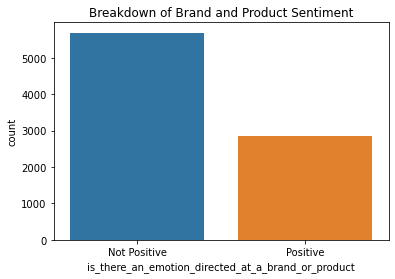

In [36]:
# Create a bar chart for Value Counts of 'Positive' and 'Not Positive'

sns.countplot(x='is_there_an_emotion_directed_at_a_brand_or_product', data=df)

plt.title("Breakdown of Brand and Product Sentiment")

# Modeling

The Data Understanding phase is complete.  I will transition to creating two types of sentiment analysis models - Naive Bayes and Decision Tree.

## Pre-Processing

Before I create any type of sentiment analysis model, I will need to perform natural language pre-processing.  Natural language pre-processing entails the following:

- Tokenization
- Removing capitlization
- Removing punctuation
- Removing stopwords
- Stemming

In [54]:
# Enhancing Stopwords


# Calling English stopwords

stopwords_list = stopwords.words('english')


# Adding punctuation to the stopwords list

stopwords_list += list(string.punctuation)


# Adding numbers '0-9' as strings to the stopwords list

stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


# Adding the following words - sxsw, mention, rt, austin, quot, amp, link - to the stopwords list

stopwords_list += ['sxsw', 'mention', 'rt', 'austin', 'quot', 'amp', 'link']


In [55]:
# Create tokenizer 

# Creating Pattern

pattern = r"([a-zA-Z]+(?:’[a-z]+)?)"

# Creating tokenizer

tokenizer = RegexpTokenizer(pattern)

In [56]:
# Initializing PorterStemmer

stemmer = PorterStemmer()

In [57]:
# Creating a Natural Language Pre-Processing Function

def preprocess_text(text, tokenizer, stopwords_list, stemmer):
    
    # Standardize case (lowercase the text)
    
    text = text.lower()
    
    # Tokenize text using `tokenizer`
    
    tokens = tokenizer.tokenize(text)
    
    # Remove stopwords using `stopwords_list`
    
    tokens = [word for word in tokens if word not in stopwords_list]
    
    # Stem the tokenized text using `stemmer`
    
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    
    # Return the preprocessed text
    
    return stemmed_tokens

In [58]:
# Test Run of the Natural Language Pre-Processing Function

text = 'I study at the Flatiron School; I am concentrating in Data Science.  I started in 2024.'

preprocess_text(text, tokenizer, stopwords_list, stemmer)


['studi', 'flatiron', 'school', 'concentr', 'data', 'scienc', 'start']

I created a function for performing the natural language pre-processing.  I performed a test run of the aforementioned function on the following text, *I study at the Flatiron School; I am concentrating in Data Science.  I started in 2024.*.  The output of the natural language pre-processing functions are the following stemmed tokens:

- *studi*
- *flatiron*
- *school*
- *concentr*
- *data*
- *scienc*
- *start*

The stemmed tokens are the expected output.  I will proceed with performing a train-test split, and applying the natural language pre-processing function to the X-train and X-test.

In [59]:
# Identifying target variable

X = df['tweet_text']
y = df['is_there_an_emotion_directed_at_a_brand_or_product']


In [60]:
# Performing train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)


In [61]:
# Examining X-train

print(X_train[:10])


1790    Keeping tabs on #sxsw via  @mention Awesome iP...
8031    Not to hate on the iPad, but fleets of nerds a...
301     Those who are tweeting that Google is coming o...
451     Before It Even Begins, #Apple Wins #SXSW {link...
792     Google to launch new social network at SXSW? -...
1138    .@mention There's an expectation of engagement...
6005    RT @mention Last day to get the #LP Austin iPh...
4469    Like a venn diagram ? &quot;@mention Google to...
1955    @mention Apple pop-up store at #sxsw was 5 blo...
666     I won the iPad accessories bag! Thanks @mentio...
Name: tweet_text, dtype: object


In [62]:
# Apply Natural Langauge pre-processing function to X-train and X-test

X_train_preprocessed = X_train.apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, stemmer))

X_test_preprocessed = X_test.apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, stemmer))


In [63]:
# Examining X-train after Natural Langauge pre-processing function is applied

X_train_preprocessed.head()


1790                  [keep, tab, via, awesom, ipad, app]
8031    [hate, ipad, fleet, nerd, arm, ipad, navig, cr...
301     [tweet, googl, come, circl, platform, today, o...
451                              [even, begin, appl, win]
792     [googl, launch, new, social, network, cnet, news]
Name: tweet_text, dtype: object

In [64]:
# Examining X-test after Natural Langauge pre-processing function is applied

X_test_preprocessed.head()


4129    [join, soon, pm, hilton, ab, go, android, deve...
1904              [say, hi, new, iphon, case, zazzlesxsw]
2067    [wonder, sleev, googl, launch, new, social, ne...
462     [even, begin, appl, win, gt, gonna, get, sum, ...
763     [googl, launch, major, new, social, network, c...
Name: tweet_text, dtype: object

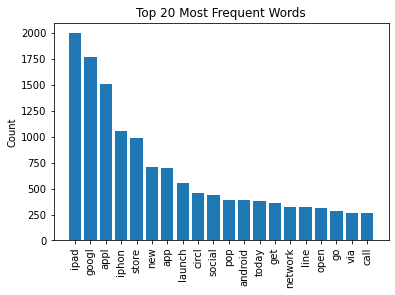

In [65]:
# Creating a plot of the most frequent 20 tokens in the X-train

# Flatten the list of lists into a single list of tokens
all_tokens = [token for sublist in X_train_preprocessed for token in sublist]

# Creating frequency distribution

fdist = FreqDist(all_tokens)
top_20 = list(zip(*fdist.most_common(20)))
tokens = top_20[0]
counts = top_20[1]

# Set up plot and plot data
fig, ax = plt.subplots()
ax.bar(tokens, counts)

# Customize plot appearance
ax.set_title("Top 20 Most Frequent Words")
ax.set_ylabel("Count")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.tick_params(axis="x", rotation=90)

# Show plot
plt.show()

## Naive Bayes

Natural language pre-processing of the tweets is complete.  I will transition towards performing the following:

- Vectorizing the data via Term Frequency-Inverse Document Frequency, or TF-IDF
- Creaing a Baseline Naive Bayes model

Before performing the vectorization, I will need to join all of the tokens back into strings for the X-train and X-test.

In [89]:
# Joining the tokens back into strings for each document

# Joining the tokens back into strings for X_train_preprocessed

X_train_preprocessed_joined = [' '.join(doc) for doc in X_train_preprocessed]


# Joining the tokens back into strings for X_test_preprocessed

X_test_preprocessed_joined = [' '.join(doc) for doc in X_test_preprocessed]

### Baseline Naive Bayes Model

In [90]:
# Applying vectorization

# Instantiating TF-IDF vectorizer

tfidf = TfidfVectorizer()

# Vectorizing X-train that has undergone Natural Langauge pre-processing

X_train_vectorized = tfidf.fit_transform(X_train_preprocessed_joined)


In [91]:
# Creating Baseline Model via Naive Bayes

# Instantiating Naive Bayes

mnb = MultinomialNB()

# Fitting model to Naive Bayes

mnb.fit(X_train_vectorized, y_train)

MultinomialNB()

In [92]:
# Generating predictions utilizing X-train

y_hat_train_mnb_base = mnb.predict(X_train_vectorized)

In [93]:
# Vectorizing X-test that has undergone Natural Language pre-processing

X_test_vectorized = tfidf.transform(X_test_preprocessed_joined)

In [94]:
# Generating predictions utilizing X-test

y_hat_test_mnb_base = mnb.predict(X_test_vectorized)

In [95]:
# Creating an evaluation metrics function

def evaluation_metrics(y_hat_train_baseline, y_train, y_hat_test_baseline, y_test):

    print('Baseline Training Precision: ', precision_score(y_train, y_hat_train_baseline))
    print('Baseline Testing Precision: ', precision_score(y_test, y_hat_test_baseline))
    print('\n\n')
    print('Baseline Training Recall: ', recall_score(y_train, y_hat_train_baseline))
    print('Baseline Testing Recall: ', recall_score(y_test, y_hat_test_baseline))
    print('\n\n')
    print('Baseline Training Accuracy: ', accuracy_score(y_train, y_hat_train_baseline))
    print('Baseline Testing Accuracy: ', accuracy_score(y_test, y_hat_test_baseline))
    print('\n\n')
    print('Baseline Training F1-Score: ', f1_score(y_train, y_hat_train_baseline))
    print('Baseline Testing F1-Score: ', f1_score(y_test, y_hat_test_baseline))

### Tuning the Baseline Naive Bayes Model

## Decision Tree

# Overall Conclusions and Recommendations